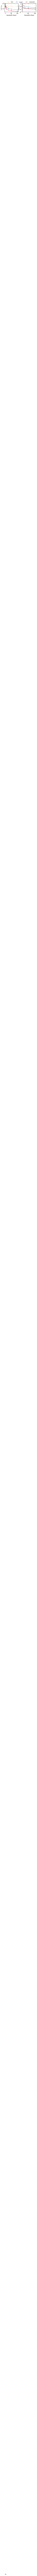

In [135]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axisartist.axislines import SubplotZero
import json
from io import StringIO
import pandas as pd
import matplotlib.patches as mpatches

fontsize = 8
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = fontsize
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=3

CYAN_LINE = "#00cccc"
CYAN = "cyan"
ORANGE_LINE = "#F2AA3C"
ORANGE = "orange"
GREEN = "#0BEF48"
BLUE = "blue"
PURPLE = "#B682F8"
colors = [
    '#004DAF',
    '#ED1B3A',
    '#FF9900',
    '#33A02C',
    '#FABEAF',
    '#AAD59B',
    '#FC5A50',
    "#008080",
    "#0000FF",
    "#808000",
    "#800080"
]
SYS_COLOR = colors[1]
WORSE_BASELINE_COLOR = colors[0]
BETTER_BASELINE_COLOR = colors[0]

fig, axes = plt.subplots(1, 2, figsize=(3.7, 1))
fig.subplots_adjust(wspace=0.3)
color = ["orange", WORSE_BASELINE_COLOR, SYS_COLOR]
style = ["x:", "v--", "o-"]




ax = axes[0]
context_len = pd.read_csv("throughput.csv", index_col=0, header=0)
context_len.plot(ax=ax, color=color, style=style, legend=None)
ax.set_ylabel("TTFT (s)", labelpad=0)
ax.set_ylim(0.05, 100)
ax.set_yscale("log")
# ax.set_xscale("log")
ax.tick_params(axis="y", which="both", pad=-1)
ax.set_xlabel("Bandwidth (Gbps)")

ax = axes[1]
context_len = pd.read_csv("throughput.csv", index_col=0, header=0)
context_len.plot(ax=ax, color=color, style=style, legend=None)
ax.set_ylabel("TTFT (s)", labelpad=-2)
ax.set_xlim(8)
ax.set_ylim(0.01, 12)
ax.set_yscale("log")
ax.tick_params(axis="y", which="both", pad=-1)
ax.set_xlabel("Bandwidth (Gbps)")
ax.legend(loc="upper right", bbox_to_anchor=[1, 1.35], frameon=False, ncols=3)
ax.axhline(y=0.2, color='black', linestyle='--')

fig.savefig("fig-sens-bw.pdf", bbox_inches="tight", transparent=True)


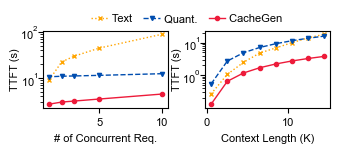

In [101]:

fig, axes = plt.subplots(1, 2, figsize=(3.7, 1))
fig.subplots_adjust(wspace=0.3)
ax = axes[0]
gpu = pd.read_csv("gpu.csv", index_col=0, header=0)
gpu.plot(ax=ax, color=color, style=style, legend=None)
ax.set_yscale("log")
ax.set_xlabel("# of Concurrent Req.")
ax.set_ylabel("TTFT (s)", labelpad=0)
ax.legend(loc="upper right", bbox_to_anchor=[2, 1.35], frameon=False, ncols=3, columnspacing=1, handletextpad=0.1, handlelength=1.5)
ax.tick_params(axis="y", which="both", pad=0)

ax=axes[1]
context_len = pd.read_csv("context_len.csv", index_col=0, header=0)
context_len.plot(ax=ax, color=color, style=style, legend=False)
ax.set_yscale("log")
ax.set_xlabel("Context Length (K)")
ax.set_ylabel("TTFT (s)", labelpad=0)
ax.tick_params(axis="y", which="both", pad=0)
fig.savefig("fig-sens-gpu-context-len-h.pdf", bbox_inches="tight", transparent=True)


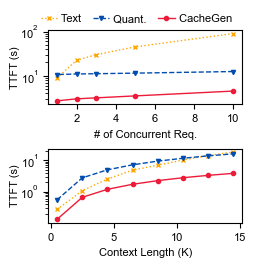

In [89]:
fig, axes = plt.subplots(2, 1, figsize=(2.5, 2.5))
fig.subplots_adjust(hspace=0.6)
ax = axes[0]
gpu = pd.read_csv("gpu.csv", index_col=0, header=0)
gpu.plot(ax=ax, color=color, style=style, legend=None)
ax.set_yscale("log")
ax.set_xlabel("# of Concurrent Req.")
ax.set_ylabel("TTFT (s)", labelpad=0)
ax.legend(loc="upper right", bbox_to_anchor=[1, 1.35], frameon=False, ncols=3, columnspacing=1, handletextpad=0.1, handlelength=1.5)

ax=axes[1]
context_len = pd.read_csv("context_len.csv", index_col=0, header=0)
context_len.plot(ax=ax, color=color, style=style, legend=False)
ax.set_yscale("log")
ax.set_xlabel("Context Length (K)")
ax.set_ylabel("TTFT (s)", labelpad=0)
fig.savefig("fig-sens-gpu-context-len-v.pdf", bbox_inches="tight", transparent=True)

In [74]:
gpu

Text   Quant.   CacheGen
Available GPU cycles (%)                           
0.1                       90.00    12.49       4.52
0.2                       45.00    11.49       3.52
0.3                       30.00    11.15       3.18
0.4                       22.50    10.99       3.02
0.5                       18.00    10.89       2.92
0.6                       15.00    10.82       2.85
0.7                       12.80    10.77       2.80
0.8                       11.25    10.74       2.77
0.9                       10.00    10.71       2.74
1.0                        9.00    10.69       2.72